In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(False)
neo.breathing(False)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# atria
models["LA"].u_vol = 0.002
models["RA"].u_vol = 0.002
models["LA"].el_min = 700
models["RA"].el_min = 700
models["LA"].el_max = 1500
models["RA"].el_max = 1500

# ventricles
models["LV"].u_vol = 0.002
models["RV"].u_vol = 0.002
models["LV"].el_min = 700
models["RV"].el_min = 700
models["LV"].el_max = 25500
models["RV"].el_max = 25500

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
neo.analyze_heart()

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.7 sec. Average model step in 0.0229 ms.

LA_LV.flow      : net  230.01662, forward  230.01662, backward        0.0 ml/kg/min, stroke volume:    1.64296 ml/kg, 
RA_RV.flow      : net  229.95062, forward  229.95062, backward        0.0 ml/kg/min, stroke volume:    1.64249 ml/kg, 
RV_PA.flow      : net  230.46408, forward  230.46408, backward        0.0 ml/kg/min, stroke volume:    1.64616 ml/kg, 
LV_AA.flow      : net   230.4641, forward   230.4641, backward        0.0 ml/kg/min, stroke volume:    1.64616 ml/kg, 
IVCI_RA.flow    : net  127.49897, forward  130.00496, backward   -2.50599 ml/kg/min, stroke volume:     0.9107 ml/kg, 
SVC_RA.flow     : net   100.1705, forward  102.47574, backward   -2.30524 ml/kg/min, stroke volume:     0.7155 ml/kg, 
LA.pres_in      : max    7.80852 min    3.57922
RA.pres_in      : max    6.76944 min    3.11672
LV.pres_in      : max   71.33454 min    1.94678
RV.pres_in      : max   41.5826

 Ready in 2.7 sec. Average model step in 0.0228 ms.


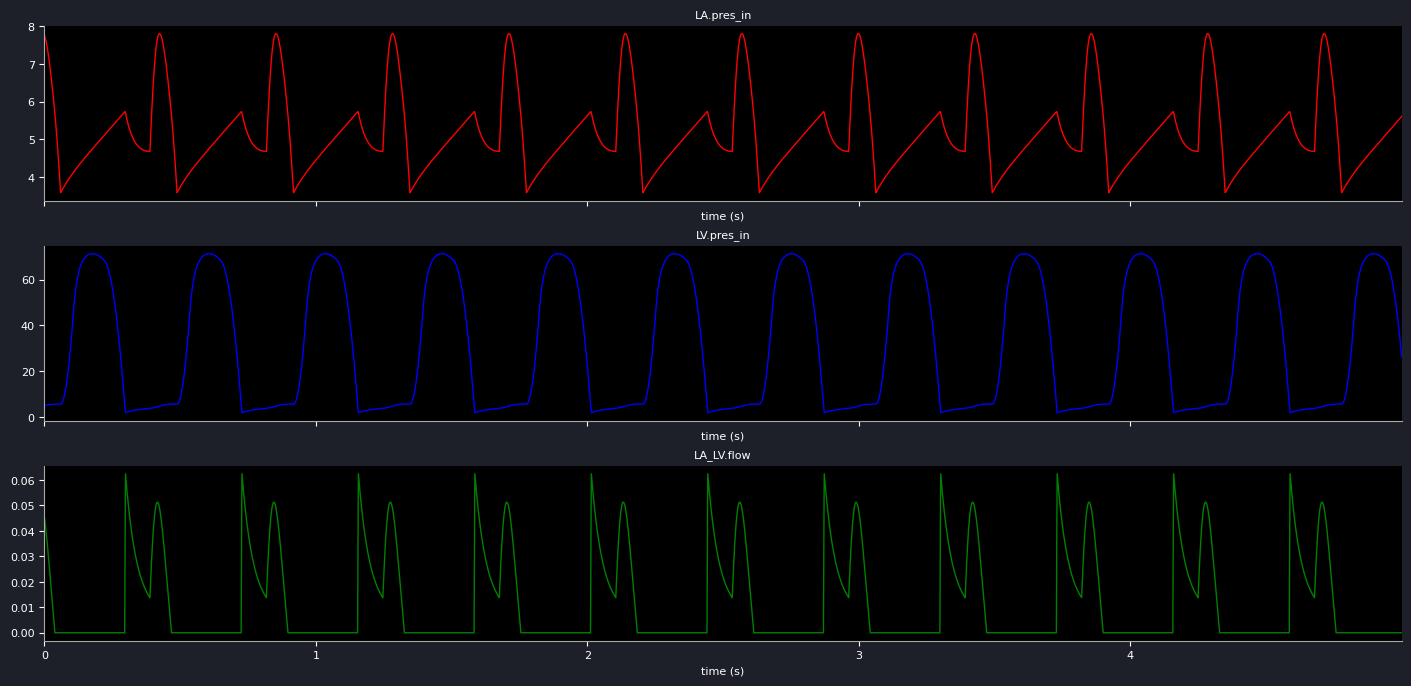


LA.pres_in      : max    7.80848 min    3.57921
LV.pres_in      : max   71.33418 min    1.94677
LA_LV.flow      : net  728.24581, forward  728.24581, backward        0.0 ml/min, stroke volume:    5.05676 ml, 


In [3]:
neo.fastforward(60)
neo.plot_time_graph(["LA.pres_in","LV.pres_in","LA_LV.flow"], combined=False, sharey=False, time_to_calculate=5, fill=False, sampleinterval=0.0005)

Target volumes
LV EDV - 2.51 ml/kg LV ESV - 0.78 ml/kg SV - 1.73 ml/kg  HF 140 bpm LVO 240 ml/kg/min